In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from xgboost import XGBClassifier


import joblib

import warnings                                                                 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('zomato.csv')

# EDA

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.shape

(9551, 21)

In [5]:
df1=pd.read_excel(r"C:\Users\HP\Downloads\Country-Code (1).xlsx")

In [6]:
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [7]:
df1.shape

(15, 2)

In [8]:
df_new=pd.merge(df,df1,) 

In [9]:
df_new

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [10]:
df_new.shape

(9551, 22)

In [11]:
df_new.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

Since , there is no null values 

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [13]:
df_new['Price range'].unique()

array([3, 4, 2, 1], dtype=int64)

In [14]:
df_new['Price range'].nunique()

4

In [15]:
df_new['Average Cost for two'].unique()

array([  1100,   1200,   4000,   1500,   1000,   2000,   6000,    800,
          900,    700,    850,    600,   3000,   1800,     55,     30,
           45,     60,     50,     80,     90,    200,    150,    100,
          230,    240,    350,    140,    170,    120,    250,     40,
           70,    300,     85,     75,    400,     65,     25,     10,
            0,     35,     20,      7,    270,    500,    430,    315,
          220,     95,    190,    260,    180,    330,    280,    160,
          285,    130,    110,   2500,   3600,    550,   1400,    450,
          950,    650,   1300,   2400,   1600,   2200,    750,   1700,
         1250,   1900,   2700,   3500,   5000,   2300,   1750,   3200,
         2100,   1850,   4500,   3300,   1350,   1650,   1950,   1050,
          290,   1450,   2800,   3650,   4800,   1550,    720,   6500,
         7000,   1150,   2900,   2600,   4700,   3700,   3800,   4100,
         4300,   2650,   5100,   5500,   4400,   4200,   8000,   2350,
      

In [16]:
df_new['Average Cost for two'].nunique()

140

# sepreting the data into numerical_feature,discrete_feature,continuous_feature and categorical_feature

In [17]:
numerical_feature = [feature for feature in df_new.columns if df_new[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df_new[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df_new.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 8
Discrete feature Count 2
Continuous feature Count 6
Categorical feature Count 14


In [18]:
print(numerical_feature)

['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


In [19]:
print(discrete_feature)

['Country Code', 'Price range']


In [20]:
print(continuous_feature)

['Restaurant ID', 'Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating', 'Votes']


In [21]:
print(categorical_feature)

['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']


# Data Describing

In [22]:
df_new.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Checking Outliers

In [23]:
def plot_boxplot(df1,ft):
    df1.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

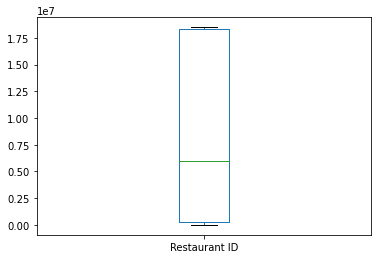

In [24]:
plot_boxplot(df_new,'Restaurant ID')

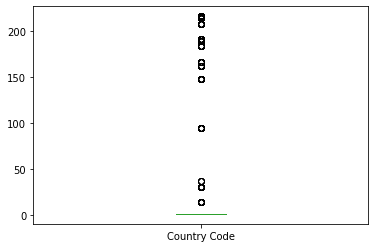

In [25]:
plot_boxplot(df_new,'Country Code')

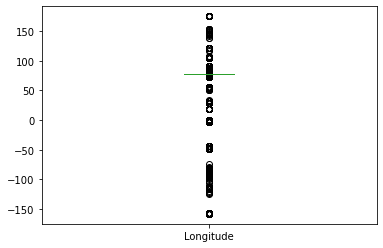

In [26]:
plot_boxplot(df_new,'Longitude')

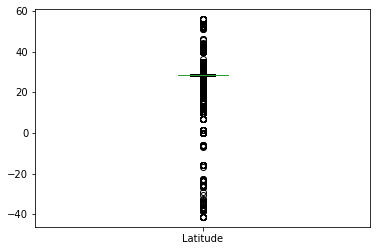

In [27]:
plot_boxplot(df_new,'Latitude')

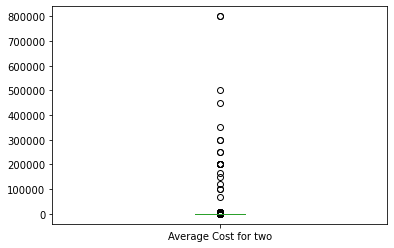

In [28]:
plot_boxplot(df_new,'Average Cost for two')

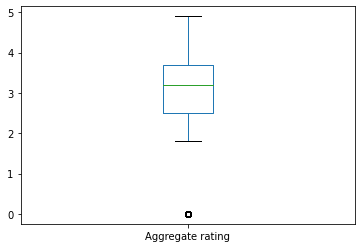

In [29]:
plot_boxplot(df_new,'Aggregate rating')

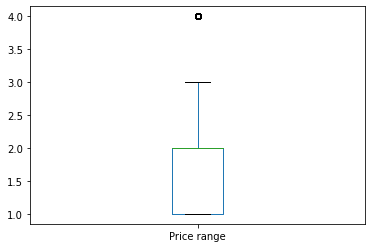

In [30]:
plot_boxplot(df_new,'Price range')

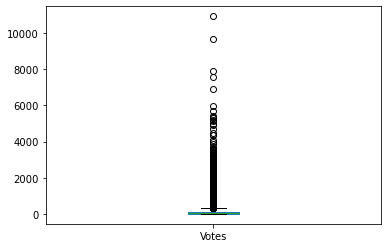

In [31]:
plot_boxplot(df_new,'Votes')

# Removing outliers

In [32]:
def outliers(df1,ft):
    Q1 = df1[ft].quantile(0.25)
    Q3 = df1[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1-1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    ls = df1.index[ (df1[ft]<lower_limit) | (df1[ft]>upper_limit) ]
    return ls

In [33]:
index_list = []

for feature in numerical_feature:
    index_list.extend(outliers(df_new,feature))

In [34]:
index_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [35]:
def remove(df1,ls):
    ls = sorted(set(ls))
    df1= df1.drop(ls)
    return df1

In [36]:
df_cleaned = remove(df_new,index_list)

In [37]:
df_cleaned.shape

(4704, 22)

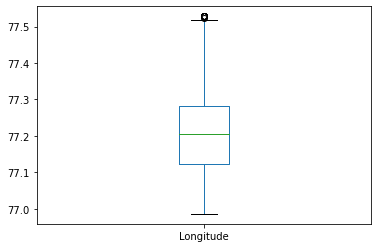

In [38]:
plot_boxplot(df_cleaned,'Longitude')

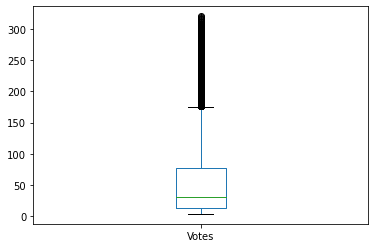

In [39]:
plot_boxplot(df_cleaned,'Votes')

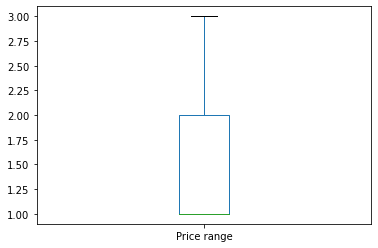

In [40]:
plot_boxplot(df_cleaned,'Price range')

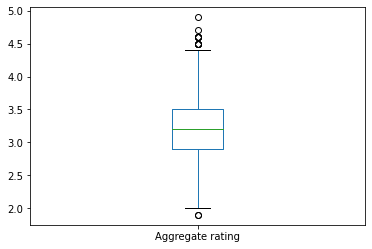

In [41]:
plot_boxplot(df_cleaned,'Aggregate rating')

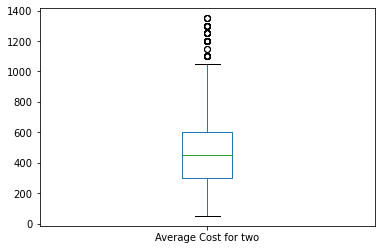

In [42]:
plot_boxplot(df_cleaned,'Average Cost for two')

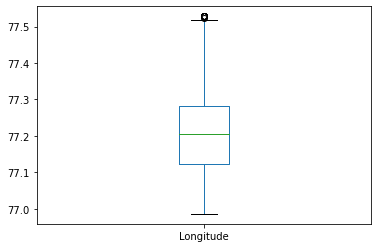

In [43]:
plot_boxplot(df_cleaned,'Longitude')

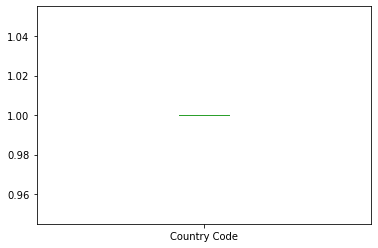

In [44]:
plot_boxplot(df_cleaned,'Country Code')

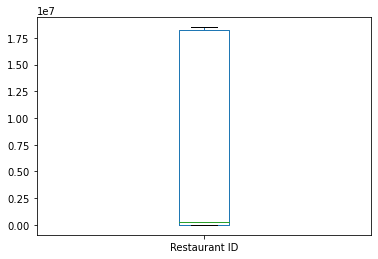

In [45]:
plot_boxplot(df_cleaned,'Restaurant ID')

In [46]:
df_cleaned.shape

(4704, 22)

In [47]:
df_cleaned = df_cleaned.drop('Country Code',axis=1)

df_cleaned.shape

(4704, 21)

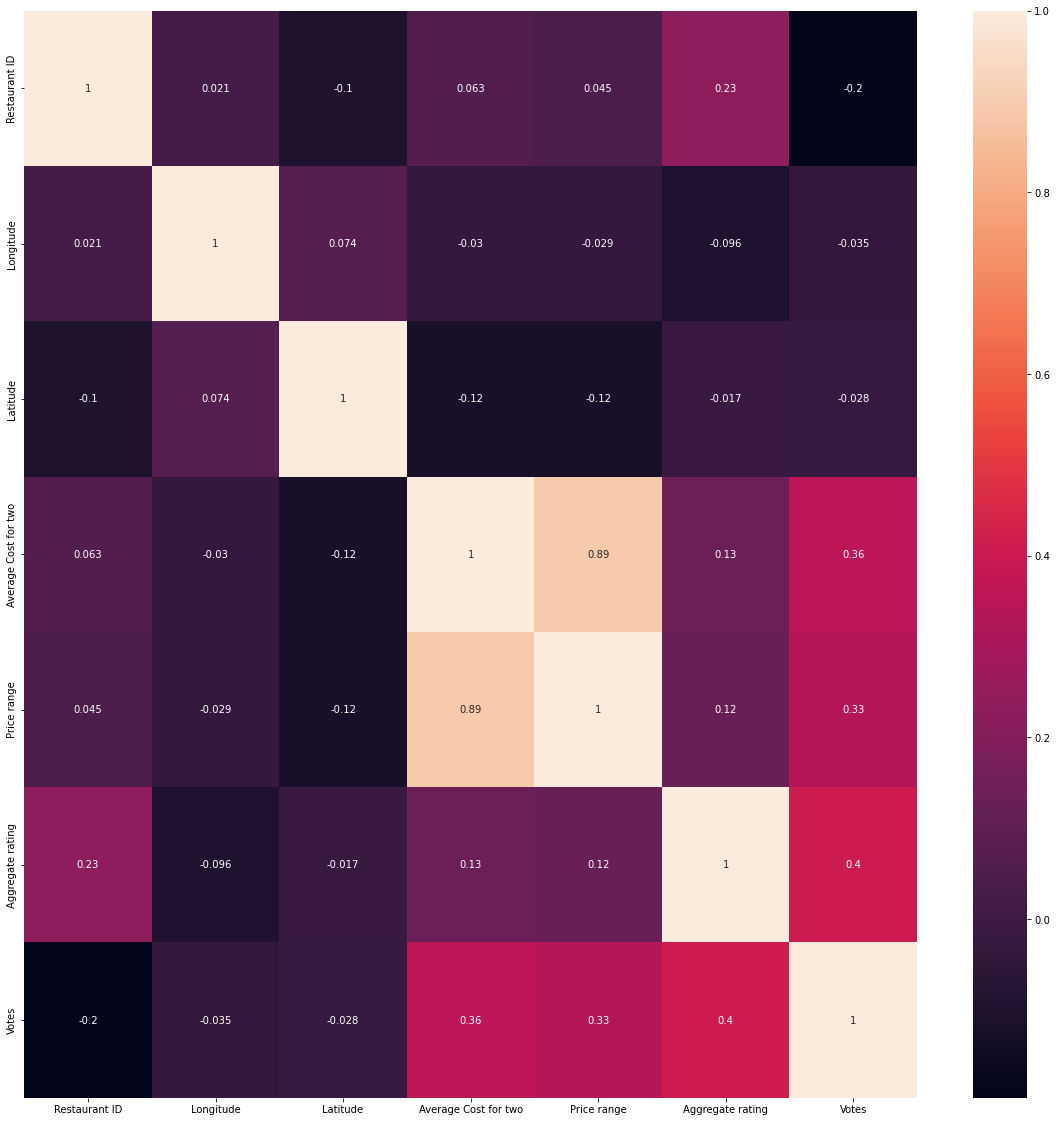

In [48]:
corrmat = df_cleaned.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

# Encording the caterogical data

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [50]:
for column in categorical_feature:
    df_cleaned.loc[:,column] = le.fit_transform(df_cleaned.loc[:,column]) 

In [51]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4704 entries, 865 to 9108
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         4704 non-null   int64  
 1   Restaurant Name       4704 non-null   int32  
 2   City                  4704 non-null   int32  
 3   Address               4704 non-null   int32  
 4   Locality              4704 non-null   int32  
 5   Locality Verbose      4704 non-null   int32  
 6   Longitude             4704 non-null   float64
 7   Latitude              4704 non-null   float64
 8   Cuisines              4704 non-null   int32  
 9   Average Cost for two  4704 non-null   int64  
 10  Currency              4704 non-null   int32  
 11  Has Table booking     4704 non-null   int32  
 12  Has Online delivery   4704 non-null   int32  
 13  Is delivering now     4704 non-null   int32  
 14  Switch to order menu  4704 non-null   int32  
 15  Price range        

# Balanceing data sets

In [52]:
df_cleaned['Price range'].value_counts()

1    2399
2    1980
3     325
Name: Price range, dtype: int64

<AxesSubplot:>

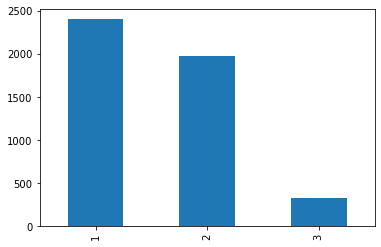

In [53]:
df_cleaned['Price range'].value_counts().plot(kind= 'bar')

In [54]:
df_cleaned.shape

(4704, 21)

# Predict price range 

In [55]:
x = df_cleaned.drop(["Price range"], axis=1)
y = df_cleaned["Price range"]

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 0)

In [57]:
x_test.shape

(941, 20)

In [58]:
x_train.shape

(3763, 20)

In [59]:
y_train.shape

(3763,)

In [60]:
y_test.shape

(941,)

In [61]:
y.value_counts()

1    2399
2    1980
3     325
Name: Price range, dtype: int64

<AxesSubplot:xlabel='Price range', ylabel='count'>

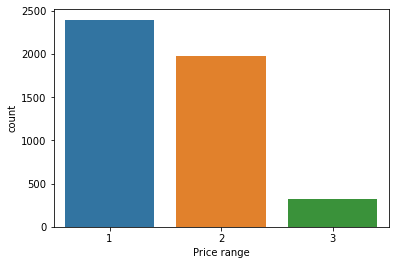

In [62]:
import seaborn as sns

sns.countplot(y)

In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
smt=SMOTE()
x_train,y_train=smt.fit_resample(x,y)

In [65]:
y_train.value_counts()

1    2399
2    2399
3    2399
Name: Price range, dtype: int64

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Model Building

In [67]:
lr=LogisticRegression() #Logistic Regression
knn=KNeighborsClassifier() #KNearest Neibour 
dt=DecisionTreeClassifier() # Deciesion Tree
rf=RandomForestClassifier() # Random Forest
adb=AdaBoostClassifier()    # Adaboost Classifier 
svm=SVC()              # support vactor classifier        
gdboost=GradientBoostingClassifier() #Gradient Boosting Classifier
xgboost=XGBClassifier()  #Xtrim Gredient Boosting Classifier 

print("Model is created")

Model is created


In [68]:
lr.fit(x_train, y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
adb.fit(x_train,y_train)
svm.fit(x_train,y_train)
gdboost.fit(x_train,y_train)
print("Model is trained")

Model is trained


In [69]:
print("Lr classification score",lr.score(x_train,y_train))
print("knn classification score",knn.score(x_train,y_train))
print("dt classification score",dt.score(x_train,y_train))
print("rf classification score",rf.score(x_train,y_train))
print("adb classification score",adb.score(x_train,y_train))
print("svm classification score",svm.score(x_train,y_train))
print("gdboost classification score",gdboost.score(x_train,y_train))


Lr classification score 0.6858889184161573
knn classification score 0.7430241828328461
dt classification score 1.0
rf classification score 1.0
adb classification score 1.0
svm classification score 0.5123571618389583
gdboost classification score 1.0


In [70]:
lr_yprad = lr.predict(x_test)
knn_yprad = knn.predict(x_test)
dt_yprad = dt.predict(x_test)
rf_yprad = rf.predict(x_test)
adb_yprad = adb.predict(x_test)
svm_yprad = svm.predict(x_test)
gdboost_yprad = gdboost.predict(x_test)


In [71]:
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for dt_model",'\n',dt_conf_mat)

rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for lr_model",'\n',rf_conf_mat)

adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for lr_model",'\n',adb_conf_mat)

svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("confusion matrix for svm_model",'\n',svm_conf_mat)

gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("confusion matrix for gdboost_model",'\n',gdboost_conf_mat)



knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("confusion matrix for gdboost_model",'\n',knn_conf_mat)

confusion matrix for lr_model 
 [[309 162   0]
 [ 98 306   0]
 [  0  66   0]]
confusion matrix for dt_model 
 [[471   0   0]
 [  0 404   0]
 [  0   0  66]]
confusion matrix for lr_model 
 [[471   0   0]
 [  0 404   0]
 [  0   0  66]]
confusion matrix for lr_model 
 [[471   0   0]
 [  0 404   0]
 [  0   0  66]]
confusion matrix for svm_model 
 [[471   0   0]
 [404   0   0]
 [ 66   0   0]]
confusion matrix for gdboost_model 
 [[471   0   0]
 [  0 404   0]
 [  0   0  66]]
confusion matrix for gdboost_model 
 [[352 119   0]
 [207 196   1]
 [ 17  45   4]]


In [72]:
lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)


svm_report = classification_report(y_test,svm_yprad)
print(" svm classification_report" ,'\n',svm_report)


gdboost_report = classification_report(y_test,gdboost_yprad)
print(" gdboost classification_report" ,'\n',gdboost_report)

 lr classification_report 
               precision    recall  f1-score   support

           1       0.76      0.66      0.70       471
           2       0.57      0.76      0.65       404
           3       0.00      0.00      0.00        66

    accuracy                           0.65       941
   macro avg       0.44      0.47      0.45       941
weighted avg       0.63      0.65      0.63       941

 knn classification_report 
               precision    recall  f1-score   support

           1       0.61      0.75      0.67       471
           2       0.54      0.49      0.51       404
           3       0.80      0.06      0.11        66

    accuracy                           0.59       941
   macro avg       0.65      0.43      0.43       941
weighted avg       0.60      0.59      0.56       941

 dt classification_report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       471
           2       1.00      1.00      1.00 

In [73]:
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [74]:
print("Mean of Cross validation score for gdboost  model","=>",cross_val_score(gdboost,x,y,cv=5).mean())
print("Mean of Cross validation score for adb model","=>",cross_val_score(adb,x,y,cv=5).mean())

Mean of Cross validation score for gdboost  model => 1.0
Mean of Cross validation score for adb model => 1.0


# Predict Average Cost for two


In [75]:
df_cleaned['Average Cost for two'].value_counts()

500     565
400     537
300     464
600     448
200     306
700     302
350     283
450     247
250     232
800     221
150     186
1000    156
550     137
100     135
650     135
1200     70
900      70
750      55
1100     42
1300     38
850      33
950      14
1250     12
50        8
1350      4
1150      2
1050      1
120       1
Name: Average Cost for two, dtype: int64

In [76]:
x = df_cleaned.drop(['Average Cost for two'], axis=1)
y = df_cleaned['Average Cost for two']

In [77]:
x.shape

(4704, 20)

In [78]:
y.shape

(4704,)

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [80]:
x_train.shape

(3151, 20)

In [81]:
y_train.shape

(3151,)

In [82]:
x_test.shape

(1553, 20)

In [83]:
y_test.shape

(1553,)

In [84]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [85]:
lm = LinearRegression()

In [86]:
lm.fit(x_train,y_train)

LinearRegression()

In [87]:
lm.coef_

array([ 9.32657488e-07, -1.90720291e-03,  8.76333015e+00, -3.67987683e-04,
        4.64703158e-01, -4.24496755e-01, -2.24665981e+01, -1.09901903e+02,
       -7.25922248e-03, -5.68434189e-14,  1.69187873e+02,  1.45574591e+01,
        4.16490117e+01,  2.13162821e-14,  3.17529464e+02, -1.07522470e+01,
       -4.00112860e-01,  1.34497942e+00,  2.34560413e-01,  0.00000000e+00])

In [88]:
lm.score(x_train,y_train)

0.8332778031290844

In [89]:
# predict the value

pred = lm.predict(x_test)
print(['predicted resultprice=',pred])
print(['actual price',y_test])

['predicted resultprice=', array([ 638.80660513,  297.87809391,  288.20911047, ...,  282.49750154,
        604.57420572, 1108.93878616])]
['actual price', 8958     500
6857     100
3344     450
7264     300
2859     100
        ... 
2871     100
5010     400
2255     200
5889     500
6742    1000
Name: Average Cost for two, Length: 1553, dtype: int64]


In [90]:
print('error')

print('Mean absolute error:',mean_absolute_error(y_test,pred))

print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error: 88.91073394753762
Mean squared error: 11194.031171560235
Root Mean squared error: 105.80184862071283


In [91]:
# r2 score--> coeficient of determination

# is proportion of the variance in the dependent variable that is predicatable from the indepandent variable

# i.e. change coming in y whenever x is being changed
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8315905276233029


In [92]:
from sklearn.linear_model import Lasso,Ridge

In [93]:
# will remove the cofficent to zero (those features are not informative).

# alpha values could be .....> .0001,.001,.01,.1,1,10------>higher values reduce all the cofficients towards 0 and impact output

# defult value of alpha -1.0

ls = Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.8332777890689659

In [94]:
ls.coef_

array([ 9.32666278e-07, -1.90717665e-03,  8.76086213e+00, -3.68900746e-04,
        4.59980225e-01, -4.20249587e-01, -2.24896329e+01, -1.09822288e+02,
       -7.25706815e-03,  0.00000000e+00,  1.69185324e+02,  1.45597876e+01,
        4.16235932e+01,  0.00000000e+00,  3.17529599e+02, -1.07505121e+01,
       -4.00995030e-01,  1.34541568e+00,  2.34540597e-01,  0.00000000e+00])

In [95]:
#ridge regression

# try to minimize the cofficient variance

rd = Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.8332778031290247

In [96]:
rd.coef_

array([ 9.32658225e-07, -1.90720207e-03,  8.76327479e+00, -3.67982423e-04,
        4.64702228e-01, -4.24495861e-01, -2.24664342e+01, -1.09901048e+02,
       -7.25924193e-03,  0.00000000e+00,  1.69187807e+02,  1.45574717e+01,
        4.16488029e+01,  0.00000000e+00,  3.17529458e+02, -1.07522531e+01,
       -4.00115988e-01,  1.34498190e+00,  2.34560567e-01,  0.00000000e+00])

In [97]:
# ElasticNet is a combination of both Lasso and Ridge

from sklearn.linear_model import ElasticNet

In [98]:
enr = ElasticNet(alpha = 0.0001)
enr.fit(x_train,y_train)
enr.score(x_train,y_train)

0.8332776327163469

In [99]:
enr.coef_

array([ 9.33811129e-07, -1.90588901e-03,  8.67600560e+00, -3.60835974e-04,
        4.58558684e-01, -4.18883920e-01, -2.22423772e+01, -1.08506566e+02,
       -7.28670600e-03,  0.00000000e+00,  1.69082283e+02,  1.45793945e+01,
        4.13054856e+01,  0.00000000e+00,  3.17520334e+02, -1.07604064e+01,
       -4.05973960e-01,  1.34937752e+00,  2.34781502e-01,  0.00000000e+00])

In [100]:
from sklearn.svm import SVR

In [101]:
from sklearn.neighbors import KNeighborsRegressor

In [102]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)

knr.score(x_train,y_train)
predknr = knr.predict(x_test)
print(predknr)

knr.score(x_test,y_test)

[640. 360. 540. ... 540. 450. 550.]


-0.12006929839260261

In [104]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtrpred = dtr.predict(x_test)
print(dtrpred)

dtr.score(x_test,y_test)

[ 500.  150.  350. ...  100.  500. 1200.]


0.760445372433776

In [105]:
from sklearn.ensemble import AdaBoostRegressor

In [106]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
adapred = dtr.predict(x_test)
print(adapred)

ada.score(x_test,y_test)

[ 500.  150.  350. ...  100.  500. 1200.]


0.8329780518643266

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)
print(rfpred)

rf.score(x_test,y_test)

[ 608.   209.   333.5 ...  228.   591.5 1081.5]


0.872814009087687

In [109]:
from sklearn.ensemble import GradientBoostingRegressor

In [111]:
gbboost = GradientBoostingRegressor()
gbboost.fit(x_train,y_train)
gbboostpred = rf.predict(x_test)
print(gbboostpred)

gbboost.score(x_test,y_test)

[ 608.   209.   333.5 ...  228.   591.5 1081.5]


0.86812268285669

we are using 5 model but RandomForestRegressor and GradientBoostingRegressor has given the best score

# Using GridsearchCV

In [113]:
from sklearn.model_selection import GridSearchCV

In [116]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [117]:
y_pred_train = clf.predict(x_train)
mean_squared_error(y_train, y_pred_train)

8844.949001023346

In [118]:
y_pred = clf.predict(x_test)
mean_squared_error(y_test, y_pred)

9678.38016132248

In [119]:
results = pd.DataFrame(zip(y_test, y_pred, y_test - y_pred), columns = ['y_test', 'y_pred', 'error'])
results.head(10)

,y_test,y_pred,error
0,500,617.943885,-117.943885
1,100,232.126487,-132.126487
2,450,310.034847,139.965153
3,300,280.529812,19.470188
4,100,281.887075,-181.887075
5,600,606.495027,-6.495027
6,350,340.951284,9.048716
7,500,621.753623,-121.753623
8,450,339.567678,110.432322
9,650,624.971069,25.028931


<AxesSubplot:>

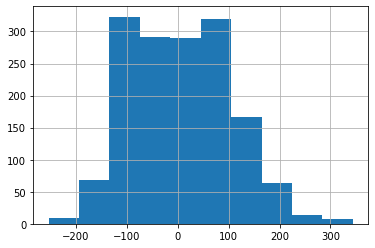

In [120]:
results['error'].hist()


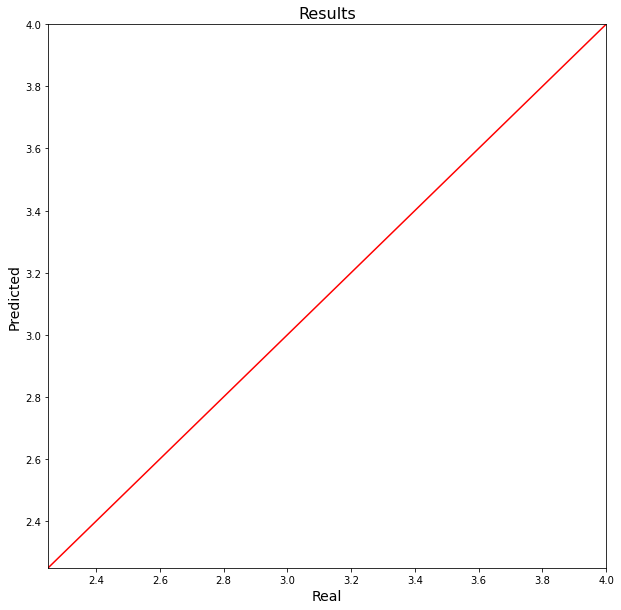

In [121]:
plt.figure(figsize=(10,10))
x=np.linspace(0,5,5)
plt.plot(results['y_test'], results['y_pred'], 'b.')
plt.plot(x, x, 'r-')
plt.xlim(2.25,4)
plt.ylim(2.25,4)
plt.title("Results", fontsize=16)
plt.xlabel("Real", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.savefig("Results.png")
plt.show()